In [1]:
from sklearn.manifold import MDS
import scipy.spatial.distance as ssd
from Bio import Align, SeqIO
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
def pairmsa(nuc1, nuc2):

    seq1 = record[nuc1.item()].seq
    seq2 = record[nuc2.item()].seq

    aligner = Align.PairwiseAligner()
    aligner.mode = 'global'

    alignment = aligner.align(seq1, seq2)[0]
    score = 1-alignment.score/len(str(alignment).split('\n')[0])

    return(score)

In [32]:
record = SeqIO.index(
    'C.fasta',
    'fasta',
    key_function=lambda entry: entry.split('|')[0]
)
accessions = list(record.keys())

In [33]:
main = np.array(accessions)
main = main.reshape(-1, 1)

In [38]:
%%timeit
dissimilarities = ssd.cdist(main, main, metric=pairmsa)

11.1 s ± 71.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [35]:
pd.DataFrame(dissimilarities, columns = accessions, index = accessions)#.max()

,AB283001(NS1),AB126196(CM2),AB126191(PB2),AB126195(NP),AB126192(PB1),AB126193(P3),AB126194(HEF),AY880247(HEF),LC124979(NS1),AM410043(NS1),...,AF170575(PB1),AF170573(NP),AF170574(P3),KM504278(PB1),KM504279(P3),KM504277(PB2),KM504281(NP),KM504283(NS1),KM504280(HEF),KM504282(CM2)
AB283001(NS1),0.000000,0.506356,0.638052,0.574103,0.641680,0.621574,0.608052,0.608052,0.071201,0.021164,...,0.641680,0.576703,0.620354,0.642798,0.622183,0.640857,0.574844,0.054110,0.608696,0.508463
AB126196(CM2),0.506356,0.000000,0.584830,0.528571,0.587884,0.568327,0.558067,0.561256,0.526466,0.507410,...,0.588446,0.528860,0.568327,0.587884,0.568327,0.584265,0.530743,0.506356,0.557428,0.033333
AB126191(PB2),0.638052,0.584830,0.000000,0.513186,0.499524,0.490541,0.505724,0.507232,0.653527,0.637490,...,0.498571,0.512848,0.493042,0.497139,0.496032,0.048680,0.514774,0.637490,0.503709,0.587086
AB126195(NP),0.574103,0.528571,0.513186,0.000000,0.513899,0.506737,0.508266,0.511699,0.594665,0.575584,...,0.513899,0.018122,0.506177,0.509650,0.508411,0.513716,0.048596,0.574103,0.511128,0.529296
AB126192(PB1),0.641680,0.587884,0.499524,0.513899,0.000000,0.500165,0.513405,0.514898,0.657699,0.641680,...,0.015120,0.515152,0.499175,0.056743,0.501154,0.500476,0.516014,0.641121,0.515892,0.589008
AB126193(P3),0.621574,0.568327,0.490541,0.506737,0.500165,0.000000,0.506667,0.505618,0.639271,0.620964,...,0.500165,0.506931,0.031560,0.501648,0.063858,0.489037,0.507295,0.620964,0.505618,0.570153
AB126194(HEF),0.608052,0.558067,0.505724,0.508266,0.513405,0.506667,0.000000,0.046183,0.627788,0.608696,...,0.512906,0.510188,0.505093,0.512408,0.506143,0.507734,0.503664,0.604176,0.083218,0.559345
AY880247(HEF),0.608052,0.561256,0.507232,0.511699,0.514898,0.505618,0.046183,0.000000,0.626512,0.607407,...,0.515892,0.511905,0.506143,0.513903,0.506667,0.508235,0.507692,0.606762,0.082331,0.561892
LC124979(NS1),0.071201,0.526466,0.653527,0.594665,0.657699,0.639271,0.627788,0.626512,0.000000,0.081395,...,0.657699,0.596546,0.638667,0.658254,0.640479,0.655758,0.596867,0.103448,0.628425,0.527520
AM410043(NS1),0.021164,0.507410,0.637490,0.575584,0.641680,0.620964,0.608696,0.607407,0.081395,0.000000,...,0.641680,0.576703,0.619743,0.642240,0.623400,0.640857,0.575584,0.060166,0.609339,0.509514


In [36]:
embedding = MDS(n_components=2, dissimilarity='precomputed')
transformed = embedding.fit_transform(dissimilarities)
data = pd.DataFrame(transformed, columns=['x', 'y'], index=accessions)

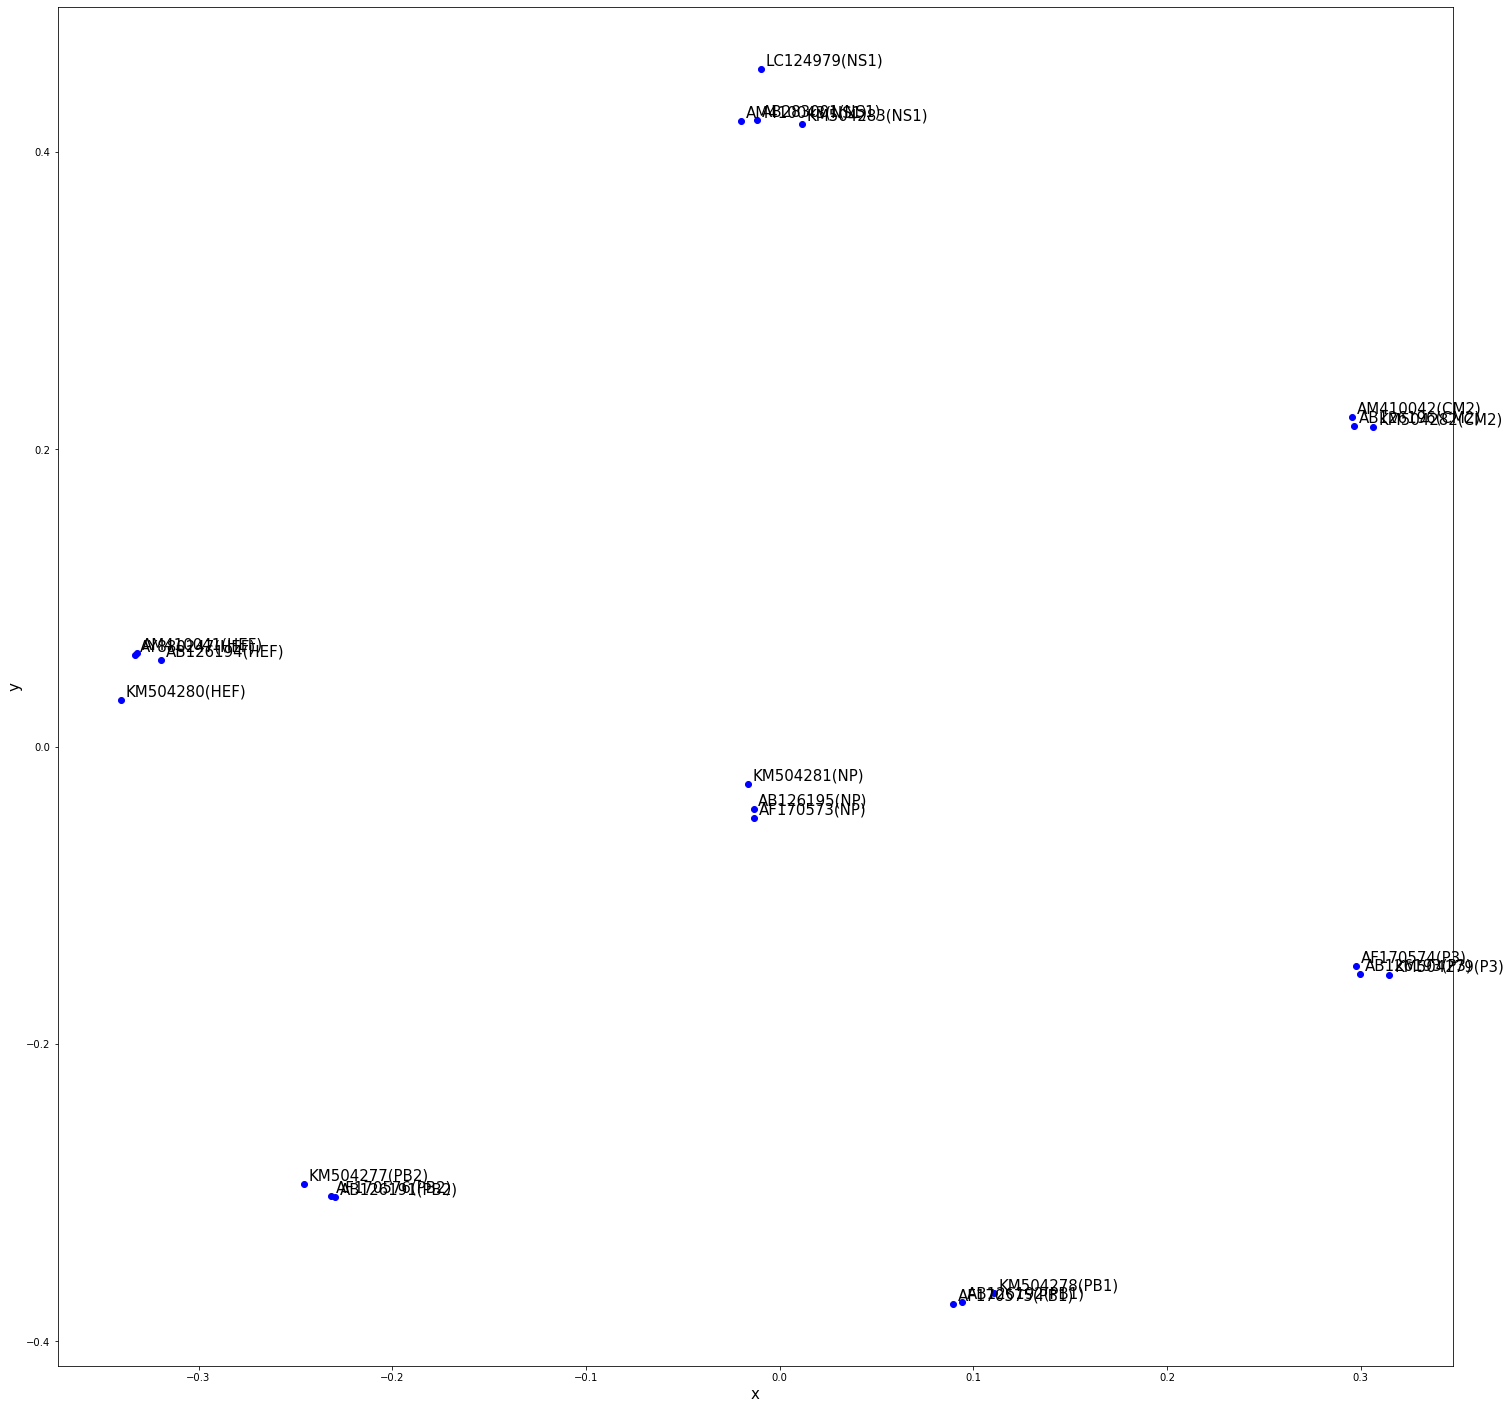

In [37]:
plt.figure(figsize=(25, 25))

for i in range(len(data)):
    x = data.iloc[i][0]
    y = data.iloc[i][1]
    name = data.iloc[i].name
    plt.plot(x, y, 'bo')
    plt.text(
        x + 0.0025,
        y + 0.0025,
        name,
        fontsize=15
    )



plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.savefig('books_read.pdf')